# **Kriteria Submission:**
* Dataset yang dipakai haruslah dataset berikut : 
rockpaperscissors, atau gunakan link ini pada wget command: https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
* Dataset harus dibagi menjadi train set dan validation set.
* Ukuran validation set harus 40% dari total dataset (data training memiliki 1314 sampel, dan data validasi sebanyak 874 sampel).
* Harus mengimplementasikan augmentasi gambar.
* Menggunakan image data generator.
* Model harus menggunakan model sequential.
* Pelatihan model tidak melebihi waktu 30 menit.
* Program dikerjakan pada Google Colaboratory.
* Akurasi dari model minimal 85%.
*Dapat memprediksi gambar yang diunggah ke Colab seperti gambar di bawah
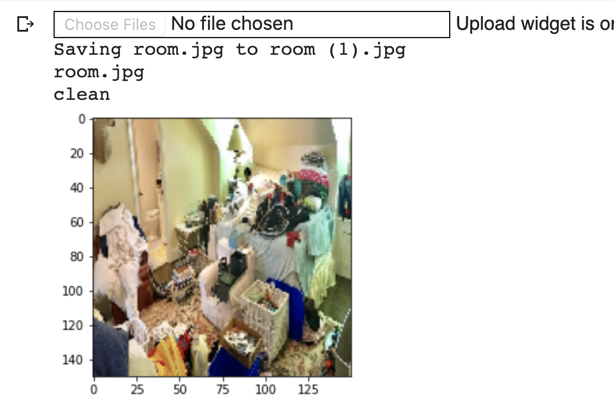

Nama   : Fiko Aditama

email  : fikoaditama114@gmail.com

sumber : https://www.dicoding.com/academies/184/tutorials/8547


In [36]:
#install dan import library
!pip install split-folders tqdm
!sudo apt install tree

import os
import tensorflow as tf
import splitfolders
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files,drive
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [37]:
print(tf.__version__) #cek versi tensorflow

2.5.0


In [38]:
#connect gdrive dengan collaboratory
drive.mount("/content/gdrive")

#download file di gdrive
!mkdir -p /content/gdrive/MyDrive/Data_Dicoding/
!wget --no-check-certificate https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip  -O /content/gdrive/MyDrive/Data_Dicoding/rockpaperscissors.zip

#ekstrak file di gdrive
!apt install unzip
!unzip -u "/content/gdrive/MyDrive/Data_Dicoding/rockpaperscissors.zip" -d "/content/gdrive/MyDrive/Data_Dicoding/"

#hilangkan folder yang berlebih
!rm -r /content/gdrive/MyDrive/Data_Dicoding/__MACOSX/
!rm -r /content/gdrive/MyDrive/Data_Dicoding/rockpaperscissors/paper/
!rm -r /content/gdrive/MyDrive/Data_Dicoding/rockpaperscissors/rock/
!rm -r /content/gdrive/MyDrive/Data_Dicoding/rockpaperscissors/scissors/

#cek struktur hierarki folder
!sudo apt install tree
!tree -d /content/gdrive/MyDrive/Data_Dicoding/

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: /content/gdrive/MyDrive/Data_Dicoding/rockpaperscissors/scissors/tZYSEIgQN7PZ31tk.png  
  inflating: /content/gdrive/MyDrive/Data_Dicoding/__MACOSX/rockpaperscissors/scissors/._tZYSEIgQN7PZ31tk.png  
  inflating: /content/gdrive/MyDrive/Data_Dicoding/rockpaperscissors/scissors/bLJSE1dl7VbQCUF9.png  
  inflating: /content/gdrive/MyDrive/Data_Dicoding/__MACOSX/rockpaperscissors/scissors/._bLJSE1dl7VbQCUF9.png  
  inflating: /content/gdrive/MyDrive/Data_Dicoding/rockpaperscissors/scissors/OYBNEmjQC8Uh2cC5.png  
  inflating: /content/gdrive/MyDrive/Data_Dicoding/__MACOSX/rockpaperscissors/scissors/._OYBNEmjQC8Uh2cC5.png  
  inflating: /content/gdrive/MyDrive/Data_Dicoding/rockpaperscissors/scissors/YTAomJ0XCIRzqKKX.png  
  inflating: /content/gdrive/MyDrive/Data_Dicoding/__MACOSX/rockpaperscissors/scissors/._YTAomJ0XCIRzqKKX.png  
  inflating: /content/gdrive/MyDrive/Data_Dicoding/rockpaperscissors/scissors/TxkHaqZ5Mg3

In [39]:
# Split dataset data train and val
splitfolders.ratio("/content/gdrive/MyDrive/Data_Dicoding/rockpaperscissors/rps-cv-images/", output="/content/gdrive/MyDrive/Data_Dicoding/rockpaperscissors/rps-cv-images/data_out", ratio=(.6, .4))

base_dir  = "/content/gdrive/MyDrive/Data_Dicoding/rockpaperscissors/rps-cv-images/data_out"
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

# membuat direktori rock,paper dan scissors pada direktori data training
train_rock  = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

# membuat direktori rock,paper dan scissors pada direktori data validasi
valid_rock  = os.path.join(validation_dir, 'rock')
valid_paper = os.path.join(validation_dir, 'paper')
valid_scissors = os.path.join(validation_dir, 'scissors')

#cek struktur hierarki folder
!tree -d /content/gdrive/MyDrive/Data_Dicoding/

Copying files: 2188 files [00:28, 76.13 files/s]


/content/gdrive/MyDrive/Data_Dicoding/
└── rockpaperscissors
    └── rps-cv-images
        ├── data_out
        │   ├── train
        │   │   ├── paper
        │   │   ├── rock
        │   │   └── scissors
        │   └── val
        │       ├── paper
        │       ├── rock
        │       └── scissors
        ├── paper
        ├── rock
        └── scissors

14 directories


In [40]:
print("Melihat jumlah file folder train dan validation rock")
!ls -l /content/gdrive/MyDrive/Data_Dicoding/rockpaperscissors/rps-cv-images/data_out/train/rock/* |wc -l
!ls -l /content/gdrive/MyDrive/Data_Dicoding/rockpaperscissors/rps-cv-images/data_out/val/rock/* |wc -l

print("Melihat jumlah file folder train dan validation paper")
!ls -l /content/gdrive/MyDrive/Data_Dicoding/rockpaperscissors/rps-cv-images/data_out/train/paper/* |wc -l
!ls -l /content/gdrive/MyDrive/Data_Dicoding/rockpaperscissors/rps-cv-images/data_out/val/paper/* |wc -l

print("Melihat jumlah file folder train dan validation scissors")
!ls -l /content/gdrive/MyDrive/Data_Dicoding/rockpaperscissors/rps-cv-images/data_out/train/scissors/* |wc -l
!ls -l /content/gdrive/MyDrive/Data_Dicoding/rockpaperscissors/rps-cv-images/data_out/val/scissors/* |wc -l

Melihat jumlah file folder train dan validation rock
435
291
Melihat jumlah file folder train dan validation paper
427
285
Melihat jumlah file folder train dan validation scissors
450
300


In [41]:
#Augmentasi Gambar
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    zoom_range=0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.4) 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.4)

In [42]:
#Image Generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [43]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [45]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])
# latih model dengan model.fit 
history = model.fit(
      train_generator,
      steps_per_epoch=50,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=32, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2
      )

Epoch 1/32
50/50 - 9s - loss: 0.1999 - accuracy: 0.9300 - val_loss: 0.5343 - val_accuracy: 0.9000
Epoch 2/32
50/50 - 9s - loss: 0.2603 - accuracy: 0.9200 - val_loss: 0.5826 - val_accuracy: 0.8500
Epoch 3/32
50/50 - 9s - loss: 0.1841 - accuracy: 0.9500 - val_loss: 0.5060 - val_accuracy: 0.9000
Epoch 4/32
50/50 - 9s - loss: 0.2509 - accuracy: 0.9150 - val_loss: 0.1318 - val_accuracy: 1.0000
Epoch 5/32
50/50 - 9s - loss: 0.1771 - accuracy: 0.9450 - val_loss: 0.1165 - val_accuracy: 0.9500
Epoch 6/32
50/50 - 8s - loss: 0.2308 - accuracy: 0.9150 - val_loss: 0.3365 - val_accuracy: 0.9000
Epoch 7/32
50/50 - 8s - loss: 0.2160 - accuracy: 0.9150 - val_loss: 0.4102 - val_accuracy: 0.9500
Epoch 8/32
50/50 - 9s - loss: 0.1469 - accuracy: 0.9400 - val_loss: 0.0840 - val_accuracy: 0.9500
Epoch 9/32
50/50 - 9s - loss: 0.1652 - accuracy: 0.9500 - val_loss: 0.2143 - val_accuracy: 0.9000
Epoch 10/32
50/50 - 9s - loss: 0.1275 - accuracy: 0.9500 - val_loss: 0.1413 - val_accuracy: 0.9000
Epoch 11/32
50/50 -

In [46]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)      

Saving 0NDYNEoDui7o64gU.png to 0NDYNEoDui7o64gU.png
0NDYNEoDui7o64gU.png
It's Rock


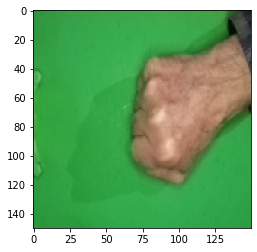

In [47]:
file_up = files.upload()
 
def predict_pic(files):
  for file in file_up.keys():
  # predicting images
    img = image.load_img(file, target_size=(150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
  
  print(file)
  if classes[0,1] == 1:
    print("It's Rock")
  elif classes[0,0] == 1:
    print("It's Paper")
  else:
    print("It's Scissors")
predict_pic(file_up)